In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

In [5]:
from sklearn.ensemble import RandomForestClassifier # https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html

forest = RandomForestClassifier(n_estimators=100, random_state=9)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

In [6]:
from sklearn.naive_bayes import GaussianNB # https://scikit-learn.org/1.5/modules/generated/sklearn.naive_bayes.GaussianNB.html

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [7]:
from sklearn.ensemble import GradientBoostingClassifier # https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=9)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=9)

In [8]:
### SCALE-SENSITIVE MODE
# dont scale for test data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# dont scale y_train cause for KNN there is no need to scale the input data

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [10]:
# classification

from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [12]:
forest.score(X_test, y_test), nb_clf.score(X_test, y_test), gb_clf.score(X_test, y_test), knn.score(X_test_scaled, y_test), log.score(X_test_scaled, y_test), svc.score(X_test_scaled, y_test)

(0.9853658536585366,
 0.8463414634146341,
 0.9414634146341463,
 0.8536585365853658,
 0.8731707317073171,
 0.9341463414634147)

In [13]:
# accuracy just show the percentage of correct predictions like guessing, issue is precision which is the percentage of correct positive predictions,
# recalls shows the percentage of correct positive predictions out of all positive predictions
from sklearn.metrics import recall_score

y_preds = forest.predict(X_test)
print('Forest:', recall_score(y_test, y_preds)) 

y_preds = nb_clf.predict(X_test)
print('NB:', recall_score(y_test, y_preds)) 

y_preds = gb_clf.predict(X_test)
print('GB:', recall_score(y_test, y_preds)) 

y_preds = knn.predict(X_test)
print('KNN:', recall_score(y_test, y_preds)) 

y_preds = log.predict(X_test)
print('LOG:', recall_score(y_test, y_preds)) 

y_preds = svc.predict(X_test)
print('SVC:', recall_score(y_test, y_preds)) 

Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9436619718309859
KNN: 0.7934272300469484
LOG: 0.046948356807511735
SVC: 0.0


c:\Users\pioru\Desktop\learn\learn\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
c:\Users\pioru\Desktop\learn\learn\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\pioru\Desktop\learn\learn\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


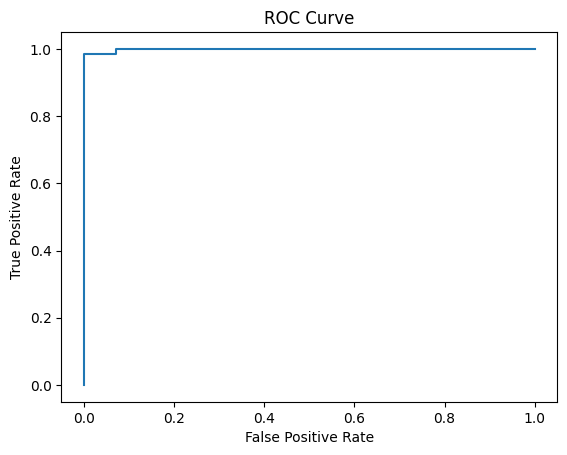

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = forest.predict_proba(X_test)[:,1]

fpr, trp, tresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, trp)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [15]:
roc_auc_score(y_test, y_probs)  

np.float64(0.9989990705655251)

In [16]:
### Hyperparameter tuning

from sklearn.model_selection import GridSearchCV # https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt''log2', None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

forest = RandomForestClassifier(n_jobs=-1,random_state=9)

grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1, verbose=2)

In [17]:
grid_search.fit(X_train, y_train)
best_forest = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\Users\pioru\Desktop\learn\learn\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
281 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\pioru\Desktop\learn\learn\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\pioru\Desktop\learn\learn\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\pioru\Desktop\learn\learn\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "

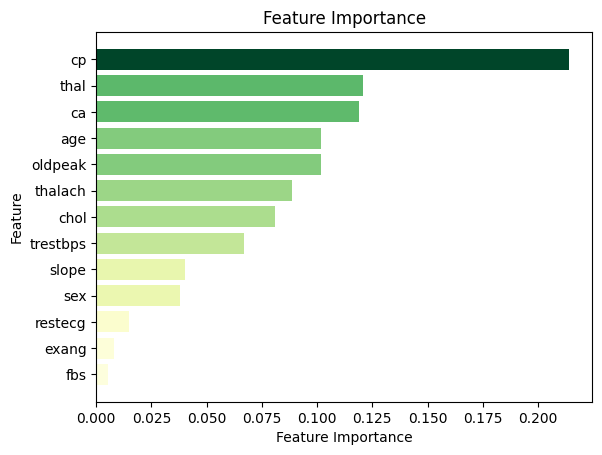

In [23]:
### Feature importance
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_

sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / sorted_importances.max())

plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

<Axes: >

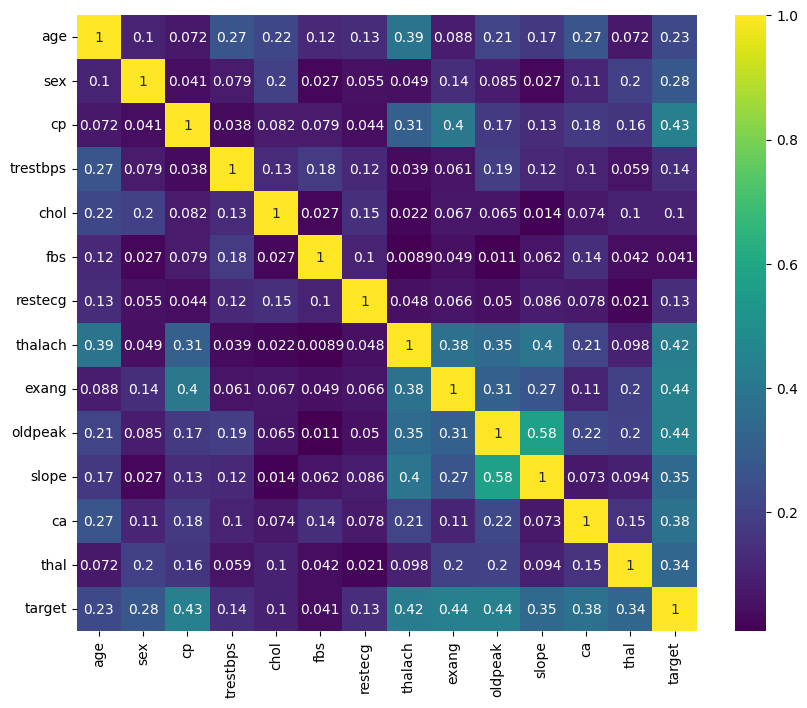

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(abs(df.corr()), annot=True, cmap='viridis')

In [26]:
best_forest.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,